# Object Preditcion and Detecting Image

### Documentation:
https://longervision.github.io/2018/07/02/DeepLearning/ImageAI-Happy-Canada-Day/
    
https://github.com/fchollet/deep-learning-models/releases
    
Manuel Robalinho - 08-11-2018

## 1. Preparation
### 1.1 Prerequisite Dependencies
As described by on ImageAI’s Github, multiple Python dependencies need to be installed:

><br/>Tensorflow
><br/>Numpy
><br/>SciPy
><br/>OpenCV
><br/>Pillow
><br/>Matplotlib
><br/>h5py
><br/>Keras

<br/>All packages can be easily installed by command:

>pip3 install PackageName

<br/>Afterwards, ImageAI can be installed by a single command:
>pip3 install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.1/imageai-2.0.1-py3-none-any.whl

---

### 1.2 CNN Models
Two models are adopted as in the examples prediction and detection.

><br/>Prediction : resnet50_weights_tf_dim_ordering_tf_kernels.h5 - can be downloaded at fchollet’s deep-learning-models [here](https://github.com/fchollet/deep-learning-models/releases)
><br/>Detection: resnet50_coco_best_v2.1.0.h5 - can be downloaded at fizyr’s keras-retinanet [here](https://github.com/fizyr/keras-retinanet/releases)

---

## 2. Examples
### 2.1 Prediction
Simple examples are given at [here](https://github.com/OlafenwaMoses/ImageAI/tree/master/imageai/Prediction) 

ImageAI provides 4 different algorithms and model types to perform <b>image prediction</b>. To perform image prediction on any picture, take the following simple steps. The 4 algorithms provided for image prediction include SqueezeNet, ResNet, InceptionV3 and DenseNet. Each of these algorithms have individual model files which you must use depending on the choice of your algorithm. To download the model file for your choice of algorithm, click on any of the links below: 

- <b>SqueezeNet</b> (Size = 4.82 mb, fastest prediction time and moderate accuracy) 
- <b>ResNet50</b> by Microsoft Research (Size = 98 mb, fast prediction time and high accuracy) 
- <b>InceptionV3</b> by Google Brain team (Size = 91.6 mb, slow prediction time and higher accuracy) 
- <b>DenseNet121</b> by Facebook AI Research (Size = 31.6 mb, slower prediction time and highest accuracy) 

In [7]:
# Import Prediction Model
from imageai.Prediction import ImagePrediction
import os
import numpy as np

path_model_pre = '../ObjectDetectionModels/ResNet50/'
path_picture = 'image/'
picture = '3037726_Oxford_Street.jpg'
all_path_picture = path_picture + picture

#--- Load Model ----
prediction = ImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(path_model_pre,"resnet50_weights_tf_dim_ordering_tf_kernels.h5"))
prediction.loadModel()

#--- Model Prediction picture ----
predictions, probabilities = prediction.predictImage((all_path_picture), result_count=5)

# Print Prediction results
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction + ' : ' + str(eachProbability))


fire_engine : 58.6394488811
streetcar : 19.0938621759
ambulance : 8.62259343266
trolleybus : 7.50556215644
police_van : 3.27147878706


In [9]:
print(all_path_picture)

image/3037726_Oxford_Street.jpg


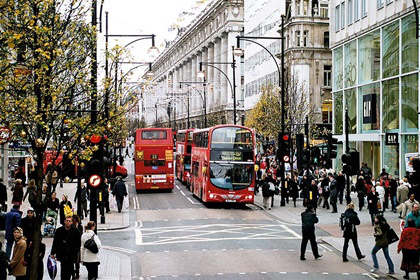

In [13]:
# Show Image
from PIL import Image                                                                                
img = Image.open(all_path_picture)
#img.show() 
img

### 2.2 Detection
Simple examples are given at https://github.com/OlafenwaMoses/ImageAI/tree/master/imageai/Detection.

In [18]:
# Import Detection Model
from imageai.Detection import ObjectDetection
import os
import numpy as np

path_model_det = '../ObjectDetectionModels/RetinaNet_model/'

#--- Load Model ----
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(path_model_det,'resnet50_coco_best_v2.1.0.h5'))
detector.loadModel()

#--- Model Detection picture ----
input_image = all_path_picture
output_image= all_path_picture + "_output.jpg"
detections = detector.detectObjectsFromImage(input_image, output_image)

# Print Detection results
for eachObject in detections:
    print(eachObject["name"] + " : " + str(eachObject["percentage_probability"]))


traffic light : 56.3270390034
person : 52.3081123829
handbag : 65.5949652195
backpack : 50.9165465832
bus : 65.4016196728
person : 65.0745689869
person : 56.9637954235
person : 56.4093410969
person : 62.2119367123
person : 73.7104713917
person : 75.748616457
person : 72.087007761
person : 71.7138230801
bus : 88.3303582668
bus : 70.3049659729
bus : 88.5606467724
bus : 62.4421596527
bus : 98.5303759575
person : 58.0802559853
person : 60.4360580444
bus : 80.058836937


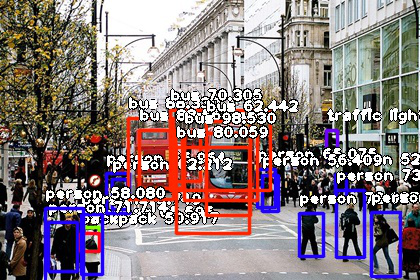

In [19]:
# Show Image
from PIL import Image                                                                                
img = Image.open(output_image)
#img.show() 
img